In [7]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
csv_path = "../Data Cleaning/Resources/NFL Arrest CSV.csv"
df = pd.read_csv(csv_path)

df.head(954)


,DATE,TEAM,NAME,POS,CASE,CATEGORY,DESCRIPTION,OUTCOME
0,1/17/2020,NE,Joejuan Williams,CB,Arrested,Drugs,"Pulled over for speeding in Nashville, accused...",Resolution undetermined.
1,1/16/2020,CLE,Odell Beckham,WR,Warrant,Battery,Accused of slapping the buttocks of a police o...,Warrant rescinded.
2,1/11/2020,NE,Julian Edelman,WR,Arrested,Vandalism,Accused of jumping on the hood of a Mercedes i...,Resolution undetermined.
3,12/29/2019,MIA,Xavien Howard,CB,Arrested,Domestic violence,"Police in Davie, Fla., say he pushed his fianc...",Resolution undetermined.
4,12/20/2019,PIT,Kameron Kelly,S,Arrested,Disorderly conduct,Accused of making threats and resisting arrest...,Resolution undetermined. Team released him sam...
...,...,...,...,...,...,...,...,...
949,2/16/2000,KC,Andre Rison,WR,Arrested,Theft,"Accused of renting but not returning a $1,100 ...","Pleaded no contest, sentenced to one year of p..."
950,2/6/2000,NYJ,Wayne Chrebet,WR,Arrested,Disorderly conduct,Accused of disorderly conduct in altercation o...,"Pleaded guilty to nuisance violation, fined $230."
951,2/6/2000,IND,Keith Elias,RB,Arrested,Disorderly conduct,Accused of resisting arrest and disorderly con...,"Pleaded guilty to nuisance violation, fined $230."
952,2/5/2000,CIN,Steve Foley,LB,Arrested,Domestic violence,Accused of kicking in the door of his son's mo...,Charge dropped after woman declined to cooperate.


In [8]:
df["crime_list"] = df.CATEGORY.str.split(",")
df["crime_count"] = df.crime_list.str.len()
df['Year'] = df['DATE'].str.split("/").str[2]
df.head()

,DATE,TEAM,NAME,POS,CASE,CATEGORY,DESCRIPTION,OUTCOME,crime_list,crime_count,Year
0,1/17/2020,NE,Joejuan Williams,CB,Arrested,Drugs,"Pulled over for speeding in Nashville, accused...",Resolution undetermined.,[Drugs],1,2020
1,1/16/2020,CLE,Odell Beckham,WR,Warrant,Battery,Accused of slapping the buttocks of a police o...,Warrant rescinded.,[Battery],1,2020
2,1/11/2020,NE,Julian Edelman,WR,Arrested,Vandalism,Accused of jumping on the hood of a Mercedes i...,Resolution undetermined.,[Vandalism],1,2020
3,12/29/2019,MIA,Xavien Howard,CB,Arrested,Domestic violence,"Police in Davie, Fla., say he pushed his fianc...",Resolution undetermined.,[Domestic violence],1,2019
4,12/20/2019,PIT,Kameron Kelly,S,Arrested,Disorderly conduct,Accused of making threats and resisting arrest...,Resolution undetermined. Team released him sam...,[Disorderly conduct],1,2019


In [9]:
df.POS.unique()

array(['CB', 'WR', 'S', 'DT', 'RB', 'LB', 'OT', 'DE', 'TE', 'QB', 'OC',
       'OG', 'FB', 'DB', 'K', 'OL', 'C', 'P', 'DE/DT'], dtype=object)

In [10]:
offense = ['WR', 'RB', 'OT', 'TE', 'QB', 'OC', 'OG', 'FB', 'K', 'OL', 'C', 'P']
defense = ['CB', 'S', 'DT', 'LB', 'DE', 'DB', 'DT']

In [11]:
offense_df = df.loc[df.POS.isin(offense), ["NAME", "Year", "crime_count"]]
got_it = offense_df['Year'].value_counts()
got_it = pd.DataFrame(got_it)
got_it = got_it.rename(columns = {'Year':'Number of Crimes by Offensive Players'})
got_it.index.name = 'year'
got_it.sort_values(by = 'year', ascending = True)

,Number of Crimes by Offensive Players
year,
2000,27
2001,23
2002,28
2003,16
2004,17
2005,21
2006,29
2007,33
2008,32


In [12]:
defense_df = df.loc[df.POS.isin(defense), ["NAME", "Year", "crime_count"]]
got = defense_df['Year'].value_counts()
got = pd.DataFrame(got)
got = got.rename(columns = {'Year':'Number of Crimes Defensive Players'})
got.index.name = 'year'
got.sort_values(by = 'year', ascending = True)

,Number of Crimes Defensive Players
year,
2000,12
2001,21
2002,15
2003,27
2004,22
2005,27
2006,42
2007,30
2008,36


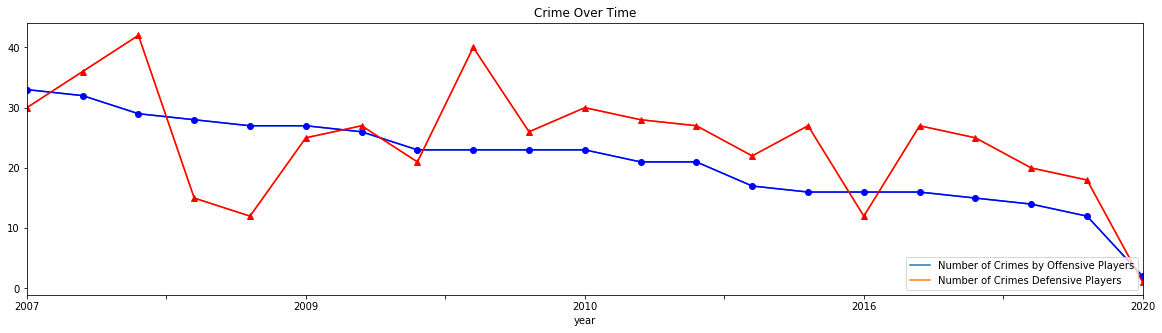

In [13]:
combo = pd.merge(got_it, got, on = 'year')

combo.plot(figsize=(20,5))
offense_num = combo['Number of Crimes by Offensive Players']
defense_num = combo['Number of Crimes Defensive Players']

offense_handle = plt.plot(offense_num, marker ='o', color='blue')

defense_handle = plt.plot(defense_num, marker='^', color='red')
plt.legend(loc="lower right")
plt.title("Crime Over Time")
plt.savefig("Crime over time.png")